In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import tqdm
import pickle
import time

from swimAD2 import swimAD2 as ad2       # copy swimAD2.py to your working directory
import dwfconstants as dwfc

ad2.disconnect()            # close all instances before connecting
zoroku = ad2.connect(0)      # connect to first(0th) ad2, give it the name 'zoroku'

8192 1638.4


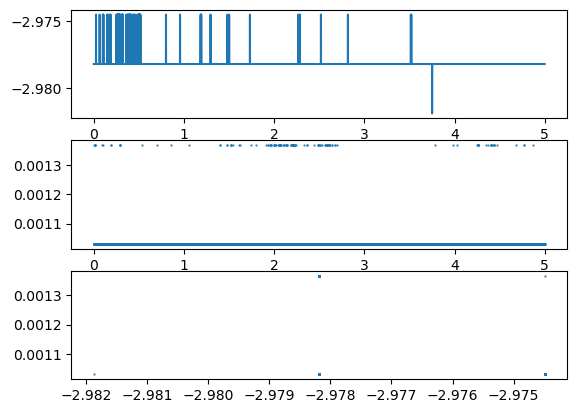

In [19]:
def sampling(time):
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        hertz = size/time
        return size,hertz

size,rate = sampling(5)
print(size,rate)
ad2.config_wavegen(zoroku, 
            frequency=0.1,
            amplitude=0,
            offset = 3,
            signal_shape= dwfc.funcSquare
            )
ad2.config_oscilloscope(zoroku,
    range0=25,
    range1=4,
    sample_rate = rate,
    sample_size= size,
    )

ad2.start_wavegen(zoroku,channel=0)
T,Ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
ad2.stop_wavegen(zoroku,channel=0)


fig, axs = plt.subplots(3,1)
axs[0].plot(T,Ch1)
axs[1].scatter(T,Ch2,s=0.3)
axs[2].scatter(Ch1,Ch2,s=0.3)

# axs[0].set


There seems to be an error that occurs with too small a frequency, so the code below looks for that effect.

0.3
7.5
10.0
15.0


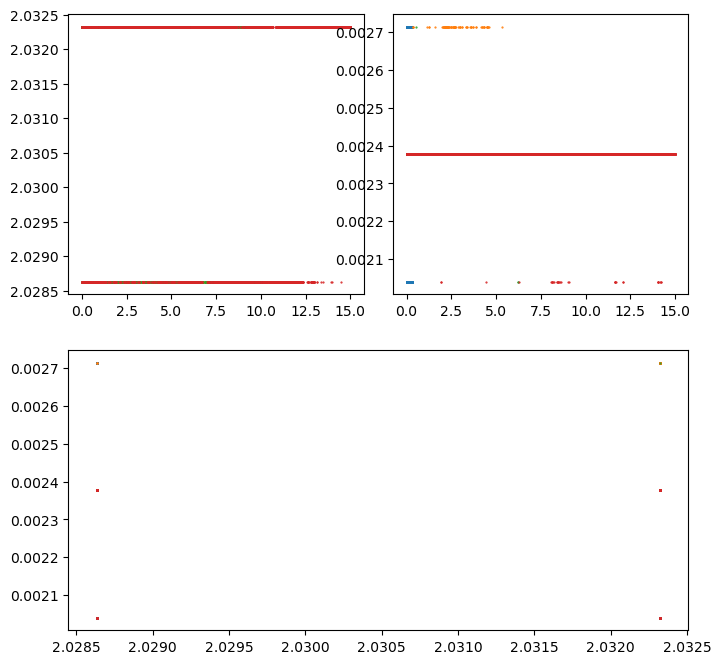

In [47]:
fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = plt.subplot(grid[0,0])
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

frequencies = [5,0.2,0.15,0.1]

for f in frequencies:
    print(1.5/f)
    size,rate = sampling(1.5/f)

    ad2.config_wavegen(zoroku, 
                frequency=f,
                amplitude=0,
                offset = 2,
                # signal_shape= dwfc.funcSquare
                )
    ad2.config_oscilloscope(zoroku,
        range0=25,
        range1=4,
        sample_rate = rate,
        sample_size= size,
        )

    ad2.start_wavegen(zoroku,channel=0)
    T,Ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
    ad2.stop_wavegen(zoroku,channel=0)

    axs1.scatter(T,Ch1,s=0.3)
    axs2.scatter(T,Ch2,s=0.3)
    axs3.scatter(Ch1,Ch2,s=0.3)